In [1]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [15]:
using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie

In [16]:
function TM(u, p, t)

    U(y) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
    σ(x) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
    
    # u[1] - E; u[2] - x; u[3] - y
    # α - 1, τ - 2, τD - 3, τy - 4, J - 5, xthr - 6, ythr - 7, U0 - 8, ΔU0 - 9, β - 10, I0 -11

    du1 = (-u[1] + p[1] * log( 1.0 + exp( (p[5] * U(u[3]) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1.0 - u[2])/p[3] - U(u[3])*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2])
    return SA[du1, du2, du3]
end;

In [17]:
t = 1500.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [18]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58;  const U0 = 0.35015;  const ΔU0 = 0.305;

In [19]:
I0 = -1.46798;

In [30]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[3.54, 0.81, 0.41]# SA[3.546743445085036, 0.815817869576369, 0.41018187322327665]

3-element SVector{3, Float64} with indices SOneTo(3):
 3.54
 0.81
 0.41

In [31]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [3.54, 0.81, 0.41]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, …, 0.305, 0.3, -1.46798]

In [32]:
lb_size = 35; tck_size = 30;

In [33]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
trange = range(0.0, t, step = tstep);

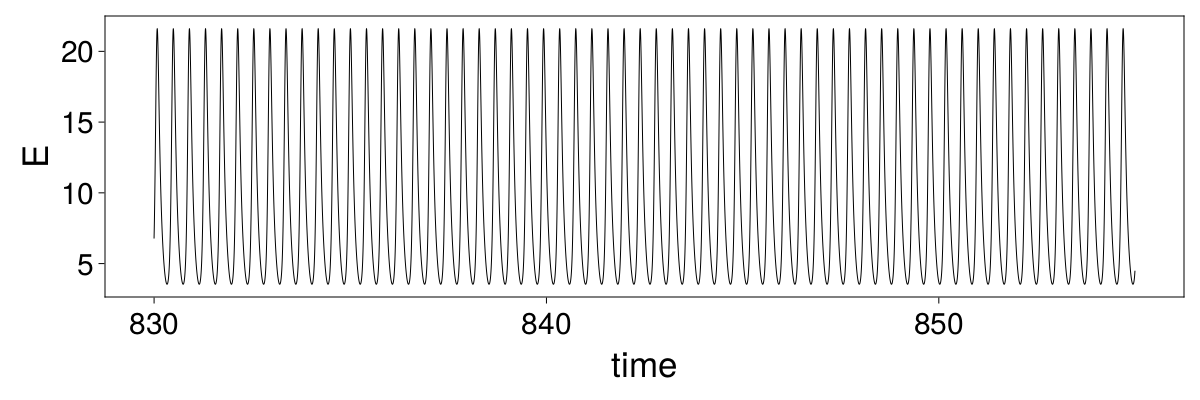

In [34]:
ts, tf = 830000, 855000

f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 1.0, color = :black)
f

In [36]:
lyapunovspectrum(ds, 50000; Ttr = 20000, diffeq = integ_set)

3-element Vector{Float64}:
  1.583333324001514e-5
 -0.0090112523323687
 -5.427546001491413

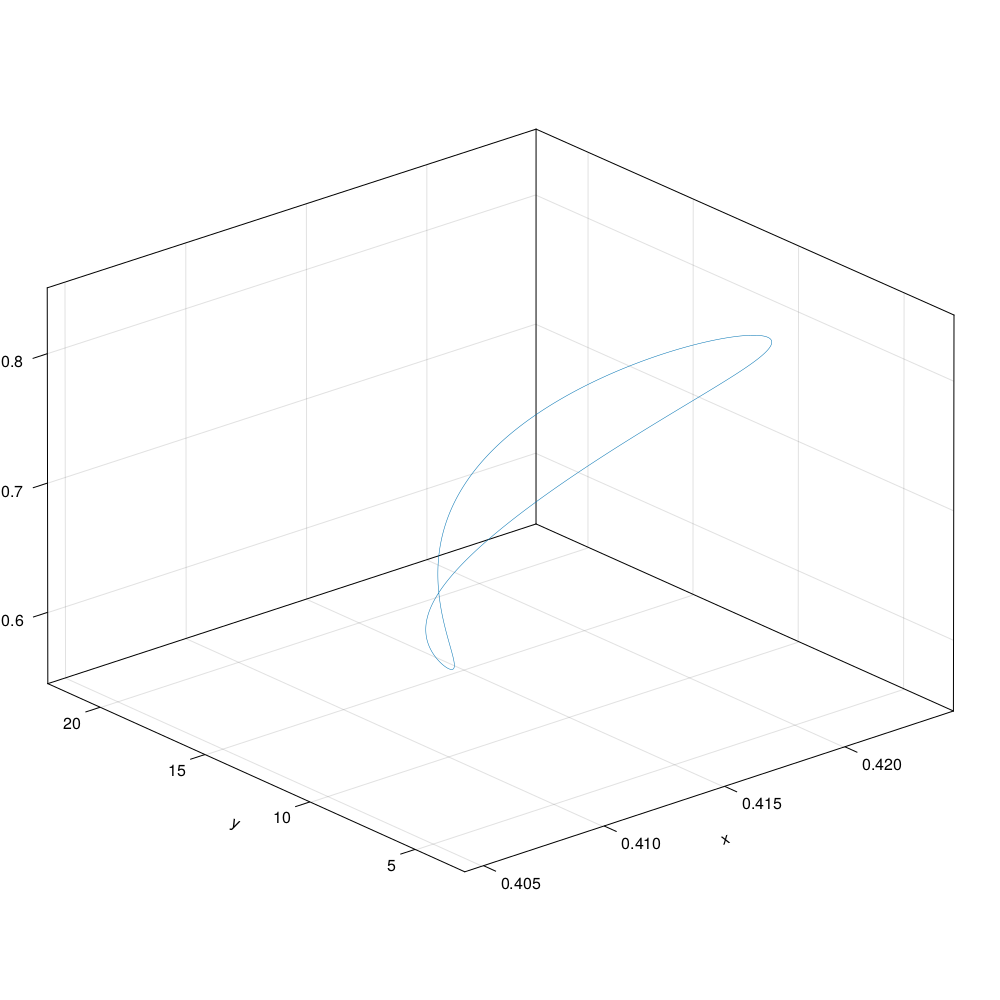

In [35]:
ts, tf = 830000, 1000000
f = Figure(resolution = (1000, 1000))
ax = Axis3(f[1, 1])
lines!(tr[ts:tf, 3], tr[ts:tf, 1], tr[ts:tf, 2], linewidth = 0.5)
f